The goal of this notebook is to observe the existing correlation between GDP and the other indicators (which are kind of sub-components of this GDP).

Since GDP is in yearly frequency and our results between the filtered tone of news data and GDP didn't gave us satisfying results, we are going to try to forecast indicators correlated "as much as possible" to the GDP.

To do so we are going to plot eahc indicator with GDP and compute its Pearson correlation

*Objective:* 
> Observe, on a macro level, the correlation between sub-components and GDP.
The goal is to identify sub-components highly correlated with GDP in order to nowcast them thanks to tone analysis of financial news (with the pipeline) 


### First, let's check the seasonality of each indicators

#### Visualization of the deocmpostion of indicators

In [ ]:
## check seasonality
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Load the Excel file
file_path = "/Users/flickr-xc/Library/Mobile Documents/com~apple~CloudDocs/DSBA Courses/CRP/Bloomberg/Bloomberg_Data_UAE.xlsx"
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names[1:]

# Create a dictionary to store the DataFrames
data_dict = {}

# Iterate through sheet names
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame
    df = pd.read_excel(file_path, sheet_name=sheet_name, usecols=[0, 1])
    # Cast 'Value' column to numeric type (int, float, etc.)
    df['Value'] = pd.to_numeric(df['Value'])

    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    # Store the DataFrame in the dictionary
    data_dict[sheet_name] = df

# Iterate through the data dictionary
for sheet_name, df in data_dict.items():
    # Set the DataFrame index as a DatetimeIndex
    df.set_index('Date', inplace=True)

    # Visual Inspection
    plt.plot(df.index, df['Value'])
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{sheet_name} Over Time')
    plt.show()

    # Decomposition Analysis
    decomposition = sm.tsa.seasonal_decompose(df['Value'], model='additive')

    # Plot the seasonal component
    plt.plot(decomposition.seasonal.index, decomposition.seasonal)
    plt.xlabel('Date')
    plt.ylabel('Seasonal Component')
    plt.title(f'Seasonal Component of {sheet_name}')
    plt.show()


#### Removing seasonality

In [ ]:
## Remove seasonality

# Create a dictionary to store the deseasonalized DataFrames
deseasonalized_data = {}

# Iterate through the data dictionary
for sheet_name, df in data_dict.items():

    # Perform seasonal decomposition using statsmodels
    decomposition = sm.tsa.seasonal_decompose(df['Value'], model='additive')

    # Obtain the deseasonalized values
    deseasonalized_values = df['Value'] - decomposition.seasonal

    # Create a new DataFrame with deseasonalized values
    deseasonalized_df = pd.DataFrame({'Date': df.index, 'Deseasonalized_Value': deseasonalized_values})

    # Store the deseasonalized DataFrame in the dictionary
    deseasonalized_data[sheet_name] = deseasonalized_df

### Let's plot and compute the correlation between GDP and indicators

OLD_GDP


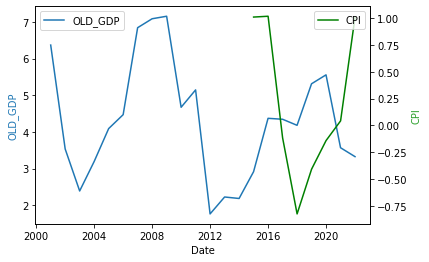

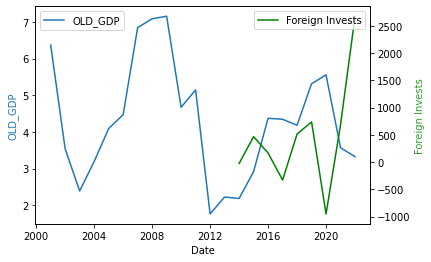

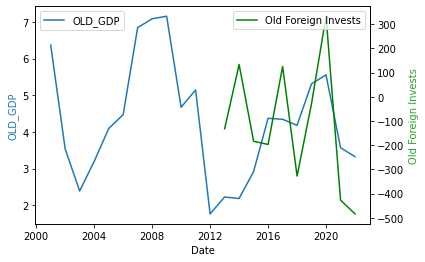

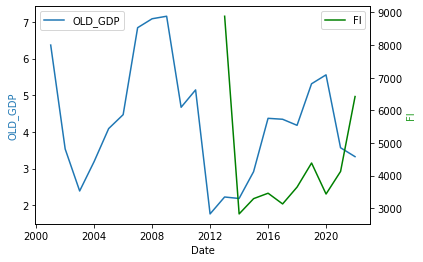

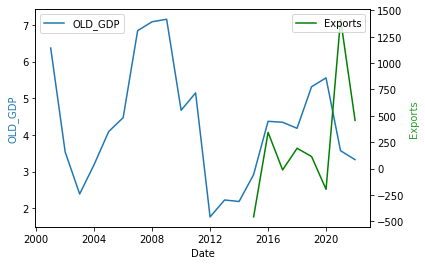

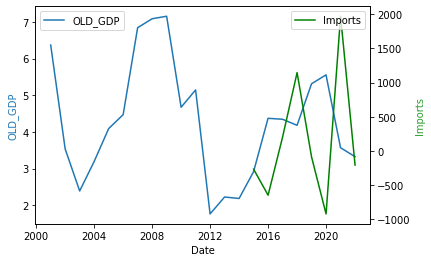

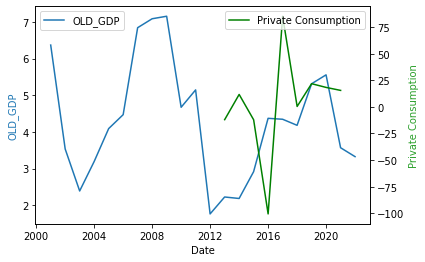

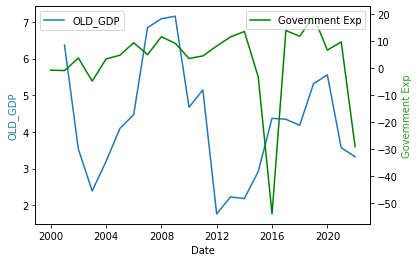

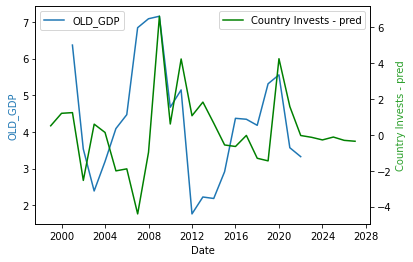

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Read the Excel file into a pandas DataFrame
excel_file = '/Users/amaury/Documents/!DSBA/CRP/Differentiated data.xlsx'
dfs = pd.read_excel(excel_file, sheet_name=None)

# Get the names of all sheets
sheet_names = list(dfs.keys())

# Get the data from the first sheet
first_sheet_name = sheet_names[2] # since the two first sheet are 1. summary of the indicators 2. an unexploitable version of GDP
print(first_sheet_name)
first_sheet_data = dfs[first_sheet_name]

# Iterate over the remaining sheets
for sheet_name in sheet_names[3:]:
    # Create a figure and axis objects
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    # Get the data from the current sheet
    current_sheet_data = dfs[sheet_name]
    current_sheet_data['year'] = current_sheet_data['Date'].dt.to_period('2Y')
    # Convert Period to datetime
    current_sheet_data['year'] = current_sheet_data['year'].dt.to_timestamp()
    # Plot the current sheet's data with the first sheet's data
    ax1.plot(first_sheet_data['Date'], first_sheet_data['Value'], label=first_sheet_name)
    ax2.plot(current_sheet_data.groupby(current_sheet_data['year'])['Value'].mean(), label=sheet_name,color='g')

    # Set the labels and titles for each y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel(first_sheet_name, color='tab:blue')
    ax2.set_ylabel(sheet_name, color='tab:green')
    
    # Display a legend for each plot
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    # Show the plot
    plt.show()

In [16]:
# SELECT THE DESIRED INDICATOR
current_sheet_data = dfs['Foreign Invests']

# Assuming 'Date' column contains date/time values in string format
current_sheet_data['Date'] = pd.to_datetime(current_sheet_data['Date'])

# Set 'Date' column as the index
current_sheet_data.set_index('Date', inplace=True)

# Resample the DataFrame
current_sheet_data_resampled = current_sheet_data.resample('2Y', convention='end').mean()

ind = current_sheet_data.groupby(current_sheet_data['year'])['Value'].mean()

In [21]:
# GDP time series
gdp = first_sheet_data['Value'].loc[:6] # from 2017 to 2022
gdp = gdp[::-1]
gdp

# Indicator time series
final_ind = ind[3:] #adjust the starting point to match with the gdp time series

In [22]:
print(final_ind)
corr,_= pearsonr(final_ind,gdp)
print(corr)

year
2016-01-01     166.15
2017-01-01    -328.60
2018-01-01     517.25
2019-01-01     737.25
2020-01-01    -951.15
2021-01-01     692.65
2022-01-01    2678.00
Name: Value, dtype: float64
-0.6970224238512505
